# Image Analysis
** 2016351090 Alumno Perez Bautista David  **

00 - PRACTICA 1

**Import <a href="https://numpy.org">NumPy</a>, <a href="https://matplotlib.org">matplotlib</a> and Image from <a href="https://pillow.readthedocs.io/en/stable/">PIL</a>**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

**Using PIL and matplotlib to read and display images.**

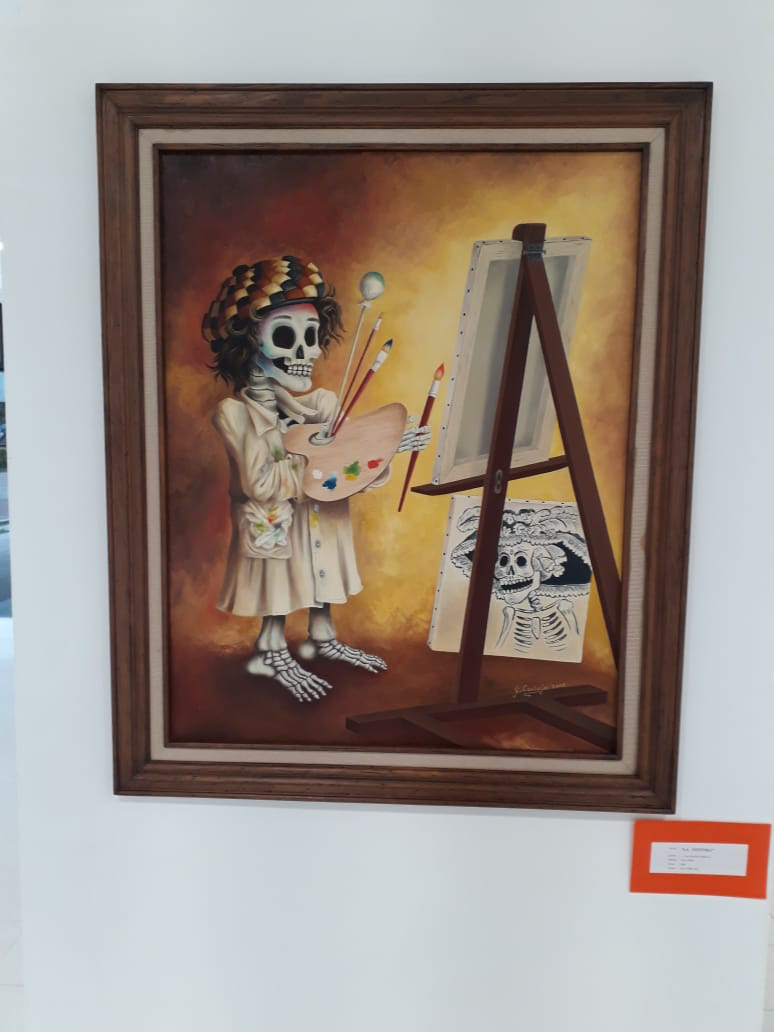

In [2]:
filepath="./" #The current directory
#filename="mark.jpeg" #The File name
filename="img2.jpeg"
pic=Image.open(filepath+filename) #Open the image
pic #Diplays the image in the notebook

**Converting the image as an array**

In [3]:
pic_arr = np.asarray(pic) #converts the image to an Numpy Array
pic_arr.shape #(height,width,#of channels)

(1032, 774, 3)

In [4]:
pic_arr

array([[[204, 218, 221],
        [204, 218, 221],
        [204, 218, 221],
        ...,
        [203, 209, 207],
        [203, 209, 207],
        [203, 209, 207]],

       [[204, 218, 221],
        [204, 218, 221],
        [204, 218, 221],
        ...,
        [203, 209, 207],
        [203, 209, 207],
        [203, 209, 207]],

       [[204, 218, 221],
        [204, 218, 221],
        [204, 218, 221],
        ...,
        [203, 209, 207],
        [203, 209, 207],
        [203, 209, 207]],

       ...,

       [[205, 214, 219],
        [205, 214, 219],
        [205, 214, 219],
        ...,
        [191, 193, 192],
        [191, 193, 192],
        [191, 193, 192]],

       [[205, 214, 219],
        [205, 214, 219],
        [205, 214, 219],
        ...,
        [191, 193, 192],
        [191, 193, 192],
        [191, 193, 192]],

       [[205, 214, 219],
        [205, 214, 219],
        [205, 214, 219],
        ...,
        [190, 192, 191],
        [190, 192, 191],
        [190, 192, 191]]

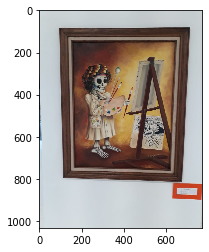

In [5]:
plt.imshow(pic_arr) #using pyplot (plt) to display the array as an image

**Using slicing to set the GREEN and BLUE channels of the picture to 0, then using imshow() to show the isolated RED channel**

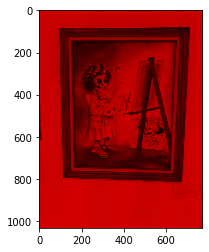

In [6]:
pic_red=pic_arr.copy()
#pic_red=pic_red[:,:,0] #0=red
#plt.imshow(pic_red,cmap='gray') #as grayscale
pic_red[:,:,1]=0
pic_red[:,:,2]=0
plt.imshow(pic_red)

**Using slicing to set the RED and BLUE channels of the picture to 0, then using imshow() to show the isolated GREEN channel**

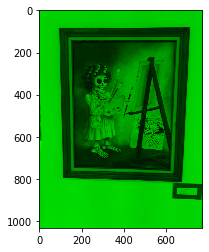

In [7]:
pic_green=pic_arr.copy()
#pic_green=pic_green[:,:,1] #1=green
#plt.imshow(pic_green,cmap='gray') #as grayscale
pic_green[:,:,0]=0
pic_green[:,:,2]=0
plt.imshow(pic_green)

**Using slicing to set the RED and GREEN channels of the picture to 0, then using imshow() to show the isolated BLUE channel**

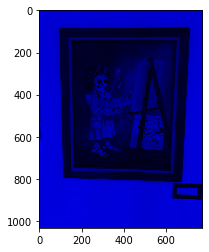

In [8]:
pic_blue=pic_arr.copy()
#pic_blue=pic_blue[:,:,2] #2=blue
#plt.imshow(pic_blue,cmap='gray') #as grayscale
pic_blue[:,:,0]=0
pic_blue[:,:,1]=0
plt.imshow(pic_blue)

**Calculating the histograms for the three channels and displays them**

Text(0.5, 0.98, 'Histogram channels')

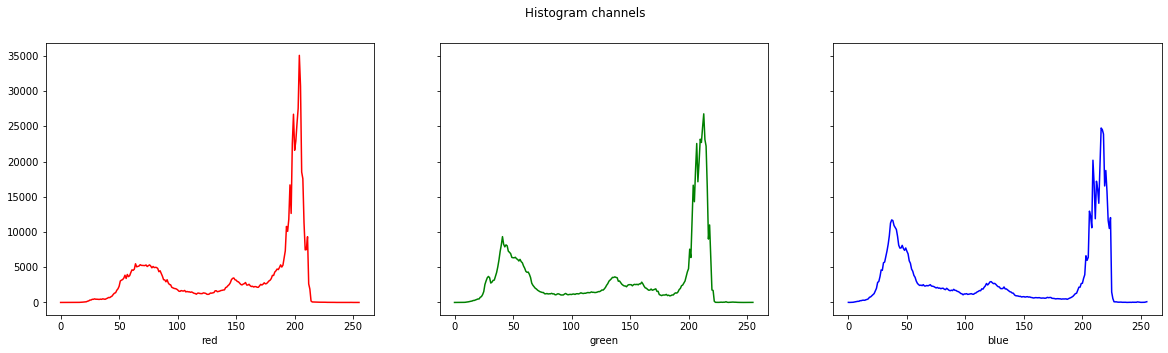

In [9]:
#Get the height and the width
height=pic_arr.shape[0]
width=pic_arr.shape[1]

#RED CHANNEL
hist_red=np.zeros(256)
for i in range(0,height):   #FOR EVERY ROW   
    for j in range(0,width):   #FOR EVERY COLUMN
        hist_red[pic_red[i,j,0]]+=1
#plt.plot(hist_red,color = "r")

#GREEN CHANNEL
hist_green=np.zeros(256)
for i in range(0,height):   #FOR EVERY ROW   
    for j in range(0,width):   #FOR EVERY COLUMN
        hist_green[pic_green[i,j,1]]+=1
#plt.plot(hist_green,color = "g")

#BLUE CHANNEL
hist_blue=np.zeros(256)
for i in range(0,height):   #FOR EVERY ROW   
    for j in range(0,width):   #FOR EVERY COLUMN
        hist_blue[pic_blue[i,j,2]]+=1
#plt.plot(hist_blue,color = "b")

fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)
axs[0].plot(hist_red,color = "r")
axs[0].set_xlabel("red")
axs[1].plot(hist_green,color = "g")
axs[1].set_xlabel("green")
axs[2].plot(hist_blue,color = "b")
axs[2].set_xlabel("blue")
fig.suptitle('Histogram channels')

**using otsu's algorithm to find the threshold, just with the read histogram**

In [10]:
def otsu(hist_red):
    w0=0
    w1=0
    Tvalue=0   
    N=np.sum(hist_red) #Probability Pi=his_red[i]/N
    Tmax=0
    TvalueMax=0
    for t in range(0,256):  
        w0=(np.sum(hist_red[0:t+1]))/N   
        w1=abs(1-w0)
        u0=0
        u1=0
        for i in range(0,t+1):
            u0+=(i*hist_red[i])/N
        u0=u0/w0        
        for j in range(t+1,256):
            u1+=j*(hist_red[j])/N
        if w1!=0:
            u1=u1/w1
        Tvalue=w0*w1*((u0-u1)*(u0-u1))
        if Tvalue>TvalueMax:
            TvalueMax=Tvalue
            Tmax=t
    return Tmax
     


C:\Users\wwwda\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


134

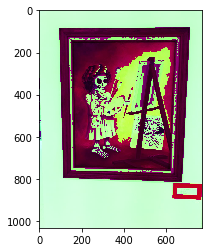

In [21]:
T=otsu(hist_red)
pic_arr2=pic_arr.copy()
pic_green[:,:,0]=0
pic_green[:,:,2]=0

for i in range(0,height):   #FOR EVERY ROW   
    for j in range(0,width):   #FOR EVERY COLUMN
        if pic_arr2[i,j,1]<T: #IF THE PIXELS VALUE IS LESS THAN THE THRESHOLD T
            pic_arr2[i,j,1]=0   #SET TO 0
        else:
            pic_arr2[i,j,1]=255 #SET TO 255

plt.imshow(pic_arr2)
T

134